<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Create-overview-map-with-custom-legend" data-toc-modified-id="Create-overview-map-with-custom-legend-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create overview map with custom legend</a></span></li><li><span><a href="#Zooming-in" data-toc-modified-id="Zooming-in-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Zooming in</a></span></li></ul></div>

In [1]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
%config InlineBackend.figure_format = 'retina'


## Load data



In [2]:
# define data directory
shapedir='/Users/maartenk/Documents/git/CookBooks/Sources/ShapeFiles/bayern-latest-free/'

# boundary = 'al_riks.shp' 
# boundary_fp = shapedir+boundary
# map_df_sweden_boundary = gpd.read_file(boundary_fp)

landuse = 'gis_osm_landuse_a_free_1.shp' 
landuse_fp = shapedir+landuse
map_df_bayern_landuse = gpd.read_file(landuse_fp)

# # read files

rail = 'gis_osm_railways_free_1.shp' 
rail_fp = shapedir+rail
map_df_bayern_rail = gpd.read_file(rail_fp)

road = 'gis_osm_roads_free_1.shp' 
road_fp = shapedir+road
map_df_bayern_road = gpd.read_file(road_fp)

water = 'gis_osm_water_a_free_1.shp' 
water_fp = shapedir+water
map_df_bayern_water = gpd.read_file(water_fp)

natural = 'gis_osm_natural_a_free_1.shp' 
natural_fp = shapedir+natural
map_df_bayern_natural = gpd.read_file(natural_fp)



In [3]:
map_df_bayern_natural.shape

(1096, 5)

In [25]:
map_df_bayern_rail.head()

osm_id  code fclass                     name  layer bridge tunnel  \
0  2481116  6101   rail                     None      0      F      F   
1  2571242  6101   rail              Staudenbahn      0      F      F   
2  2953974  6101   rail  EichstÃ¤ttâBeilngries      0      F      F   
3  2953975  6101   rail                     None      0      F      F   
4  2953977  6101   rail                     None      0      F      F   

                                            geometry  
0  LINESTRING (10.86893 48.39377, 10.86857 48.395...  
1  LINESTRING (10.59814 48.17542, 10.59813 48.175...  
2  LINESTRING (11.17335 48.88863, 11.17297 48.889...  
3  LINESTRING (10.86732 48.08404, 10.86319 48.083...  
4  LINESTRING (10.85950 48.08227, 10.85790 48.081...

In [26]:
print('KOD \t FREQ \t KATEGORI')
print('--- \t ---- \t --------')
for x,y, z in zip(map_df_bayern_landuse['code'].value_counts().index.format(),
                  map_df_bayern_landuse['fclass'].value_counts().values.tolist(),
               map_df_bayern_landuse['fclass'].value_counts().index.format()):
    print(x,'\t', y,'\t', z)

KOD 	 FREQ 	 KATEGORI
--- 	 ---- 	 --------
7205 	 166798 	 farm
7201 	 121090 	 forest
7208 	 113240 	 meadow
7217 	 84668 	 scrub
7203 	 65881 	 residential
7218 	 44762 	 grass
7204 	 9657 	 industrial
7215 	 8370 	 orchard
7202 	 5764 	 park
7209 	 5333 	 commercial
7206 	 4932 	 cemetery
7207 	 4864 	 allotments
7214 	 2659 	 quarry
7216 	 1803 	 vineyard
7211 	 1418 	 recreation_ground
7212 	 1218 	 retail
7219 	 1069 	 heath
7210 	 589 	 nature_reserve
7213 	 270 	 military


In [29]:
print('KOD \t FREQ \t KATEGORI')
print('--- \t ---- \t --------')
for x,y, z in zip(map_df_bayern_rail['code'].value_counts().index.format(),
                  map_df_bayern_rail['fclass'].value_counts().values.tolist(),
               map_df_bayern_rail['fclass'].value_counts().index.format()):
    print(x,'\t', y,'\t', z)

KOD 	 FREQ 	 KATEGORI
--- 	 ---- 	 --------
6101 	 27967 	 rail
6104 	 1247 	 tram
6103 	 770 	 subway
6106 	 160 	 narrow_gauge
6107 	 81 	 miniature_railway
6109 	 59 	 rack
6105 	 15 	 monorail
6108 	 3 	 funicular


In [30]:
print('KOD \t FREQ \t KATEGORI')
print('--- \t ---- \t --------')
for x,y, z in zip(map_df_bayern_road['code'].value_counts().index.format(),
                  map_df_bayern_road['fclass'].value_counts().values.tolist(),
               map_df_bayern_road['fclass'].value_counts().index.format()):
    print(x,'\t', y,'\t', z)

KOD 	 FREQ 	 KATEGORI
--- 	 ---- 	 --------
5141 	 536124 	 service
5122 	 339106 	 residential
5153 	 216635 	 footway
5154 	 185650 	 path
5144 	 152496 	 track_grade2
5145 	 139597 	 track_grade3
5142 	 132668 	 track
5146 	 118132 	 track_grade4
5121 	 97393 	 unclassified
5147 	 87807 	 track_grade5
5115 	 69381 	 tertiary
5143 	 66801 	 track_grade1
5114 	 62651 	 secondary
5152 	 54710 	 cycleway
5155 	 30845 	 steps
5113 	 27427 	 primary
5123 	 15286 	 living_street
5111 	 12893 	 motorway
5131 	 7373 	 motorway_link
5124 	 5337 	 pedestrian
5112 	 4788 	 trunk
5133 	 3687 	 primary_link
5132 	 3231 	 trunk_link
5134 	 1849 	 secondary_link
5135 	 765 	 tertiary_link
5199 	 582 	 unknown
5151 	 465 	 bridleway


In [31]:
print('KOD \t FREQ \t KATEGORI')
print('--- \t ---- \t --------')
for x,y, z in zip(map_df_bayern_water['code'].value_counts().index.format(),
                  map_df_bayern_water['fclass'].value_counts().values.tolist(),
               map_df_bayern_water['fclass'].value_counts().index.format()):
    print(x,'\t', y,'\t', z)

KOD 	 FREQ 	 KATEGORI
--- 	 ---- 	 --------
8200 	 82765 	 water
8221 	 9492 	 wetland
8202 	 2053 	 river
8201 	 1723 	 reservoir
8211 	 13 	 glacier
8203 	 7 	 dock


In [4]:
map_df_bayern_landuse.crs

{'init': 'epsg:4326'}

In [46]:
# from shapely.geometry import Point
# from matplotlib import pyplot
# import cartopy.crs as ccrs
# import matplotlib.pyplot as plt

final_crs = {'init': 'epsg:3006'}

# ax = plt.axes()
# print(f'Original CRS: {map_df_bayern_landuse.crs}')
map_df_bayern_landuse=map_df_bayern_landuse.to_crs(crs=final_crs)
# print(f'New CRS: {map_df_bayern_landuse.crs}')

# map_df_bayern_road=map_df_bayern_road.to_crs(crs=final_crs)
# map_df_bayern_rail=map_df_bayern_rail.to_crs(crs=final_crs)
# map_df_bayern_water=map_df_bayern_water.to_crs(crs=final_crs)

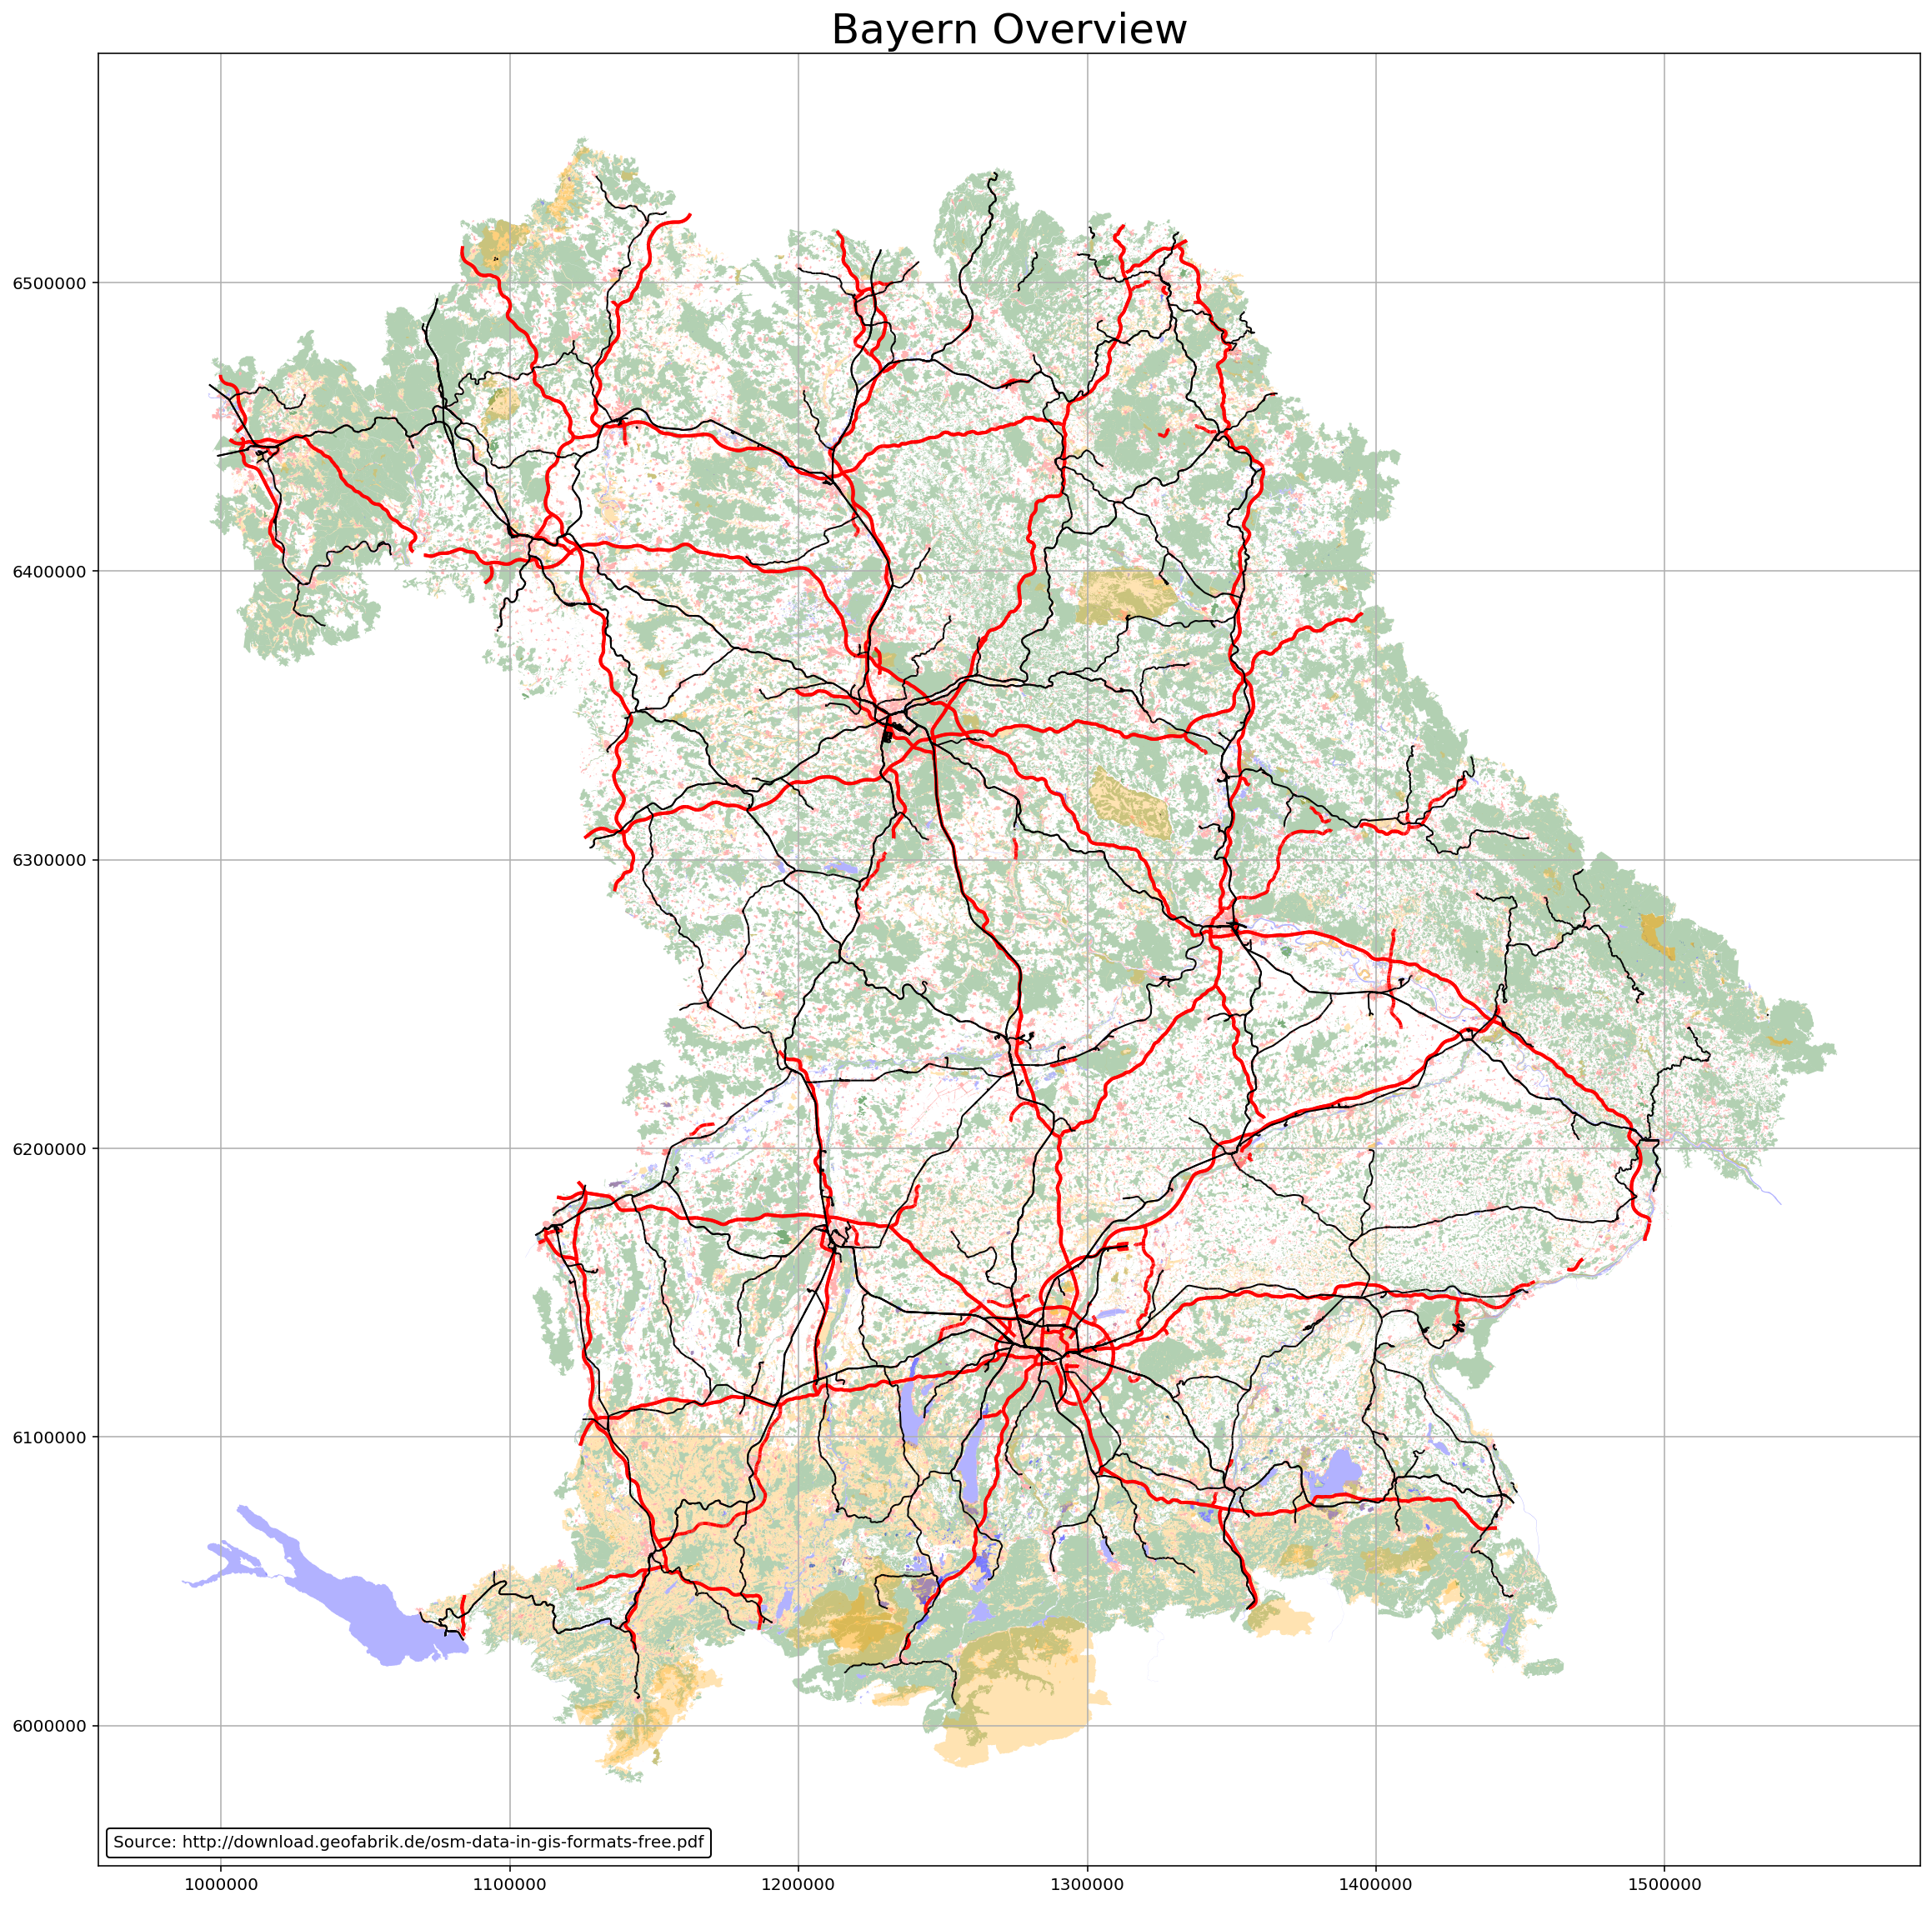

In [32]:
# Load specific libraries
import matplotlib.patheffects as mpe
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.offsetbox import AnchoredText
# set some parameters
outline=mpe.withStroke(linewidth=8, foreground='black')
alpha = .3
source = 'http://download.geofabrik.de/osm-data-in-gis-formats-free.pdf'


#Define fig,ax
fig = plt.figure(figsize=(20,20)) 
ax = plt.axes()

#define layers
map_df_bayern_water.plot(ax=ax, facecolor='blue',alpha=alpha, label='Water')
water_patch = mpatches.Patch(color='blue', alpha=alpha, label='Water')

map_df_bayern_landuse.loc[map_df_bayern_landuse['code'].isin([7203,7204,7214,7112,7209])].plot(
    ax=ax, facecolor='red', alpha=alpha, label='Build-up')
buildup_patch = mpatches.Patch(color='red', alpha=alpha, label='Build Up')

map_df_bayern_landuse.loc[map_df_bayern_landuse['code'] == 7201].plot(
    ax=ax, facecolor='darkgreen', alpha=alpha, label='forest')
forest_patch = mpatches.Patch(color='darkgreen', alpha=alpha, label='Forest')

map_df_bayern_landuse[map_df_bayern_landuse['code'].isin([7219,7217,7208,7218,7202,7210,7207,7215,7213,7216])].plot(
    ax=ax, facecolor='orange', alpha=alpha, label='Open area')
open_patch = mpatches.Patch(color='orange', alpha=alpha, label='Open Areas')

# map_df_bayern_boundary.loc[map_df_bayern_boundary['KKOD'] <= 4130].plot(ax=ax, edgecolor='black', lw=.5)
# boundary_line = mlines.Line2D([], [],label='Boundary')

map_df_bayern_road.loc[map_df_bayern_road['code'] < 5113].plot(ax=ax,color='red', lw=2)#,path_effects=[outline])
road_line = mlines.Line2D([], [], color='red', label='Major roads')

map_df_bayern_rail.loc[map_df_bayern_rail['code'] == 6101].plot(ax=ax, color='black', lw=1, label='railroad')
rail_line = mlines.Line2D([], [], color='blue', label='Railroads')  

# #create text labels
# names = map_df_bayern_names[map_df_bayern_names['KKOD'].isin([109, 104])]

# texts = []

# for x, y, label in zip(names.geometry.x, 
#                        names.geometry.y, 
#                        names['TEXT']):
#                          texts.append(plt.text(x, y, label, fontsize = 12, weight='heavy', 
#                                               bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='none')))
#add title     
ax.set_title('Bayern Overview', fontdict={'fontsize': '25', 'fontweight' : '3'})

#add annotation
at = AnchoredText(f'Source: {source}',
                  prop=dict(size=10), frameon=True,
                  loc='lower left')
at.patch.set_boxstyle('round,pad=0.,rounding_size=0.2')
ax.add_artist(at)

#plot leggend
# plt.legend(handles=[water_patch, buildup_patch, forest_patch, open_patch, 
#                     road_line, rail_line, boundary_line], bbox_to_anchor=(1.05, 0), 
#            loc='lower left', borderaxespad=0., title='Legend', title_fontsize='12')

ax.grid(True)
# ax.axis('off')

plt.show()

In [5]:

mapxwest = 11.15
mapxeast = 11.54
mapysouth = 48.88
mapynorth = 49.01

shapexwest = mapxwest * .9
shapexeast = mapxeast * 1.1
shapeysouth = mapysouth * .9
shapeynorth = mapynorth * 1.1

In [6]:
bounds=map_df_bayern_water['geometry'].cx[shapexwest:shapexeast,shapeysouth:shapeynorth]
map_df_bayern_water = map_df_bayern_water[map_df_bayern_water.geometry.within(bounds)]

# map_df_bayern[map_df_bayern.geometry.within(map_df_bayern['geometry'].cx[shapexwest:shapexeast,shapeysouth:shapeynorth])]

# bounds=map_df_bayern_boundary['geometry'].cx[shapexwest:shapexeast,shapeysouth:shapeynorth]
# map_df_bayern_boundary = map_df_bayern_boundary[map_df_bayern_boundary.geometry.within(bounds)]

# map_df_bayern[map_df_bayern.geometry.within(map_df_bayern['geometry'].cx[shapexwest:shapexeast,shapeysouth:shapeynorth])]

bounds=map_df_bayern_rail['geometry'].cx[shapexwest:shapexeast,shapeysouth:shapeynorth]
map_df_bayern_rail = map_df_bayern_rail[map_df_bayern_rail.geometry.within(bounds)]

# map_df_bayern[map_df_bayern.geometry.within(map_df_bayern['geometry'].cx[shapexwest:shapexeast,shapeysouth:shapeynorth])]

bounds=map_df_bayern_road['geometry'].cx[shapexwest:shapexeast,shapeysouth:shapeynorth]
map_df_bayern_road = map_df_bayern_road[map_df_bayern_road.geometry.within(bounds)]

# map_df_bayern[map_df_bayern.geometry.within(map_df_bayern['geometry'].cx[shapexwest:shapexeast,shapeysouth:shapeynorth])]

# bounds=map_df_bayern_names['geometry'].cx[mapxwest:mapxeast,mapysouth:mapynorth]
# map_df_bayern_names_ = map_df_bayern_names[map_df_bayern_names.geometry.within(bounds)]
# map_df_bayern_names_.loc[(map_df_bayern_names_['KKOD'].isin([109, 104, 108]))].shape
# map_df_bayern[map_df_bayern.geometry.within(map_df_bayern['geometry'].cx[shapexwest:shapexeast,shapeysouth:shapeynorth])]

In [7]:
map_df_bayern_road

osm_id  code        fclass                name      ref oneway  \
0               99  5115      tertiary                None   FFB 11      B   
1              100  5114     secondary                None  St 2069      B   
2              680  5111      motorway                None     A 99      F   
3             2173  5114     secondary   MÃ¼nchner StraÃe  St 2573      B   
4             2175  5114     secondary  Tegernseer StraÃe  St 2573      B   
...            ...   ...           ...                 ...      ...    ...   
2373670  767375124  5154          path                None     None      B   
2373671  767375126  5155         steps                None     None      B   
2373673  767378222  5142         track                None     None      B   
2373674  767378223  5142         track                None     None      B   
2373675  767378227  5147  track_grade5                None     None      B   

         maxspeed  layer bridge tunnel  \
0               0      0      F      F   
1             100      0      F      F   
2               0      1      T      F   
3              70      0      F      F   
4              70      0      F      F   
...           ...    ...    ...    ...   
2373670         0      0      F      F   
2373671         0      0      F      F   
2373673         0      0      F      F   
2373674         0      0      F      F   
2373675         0      0      F      F   

                                                  geometry  
0        LINESTRING (11.36639 48.17411, 11.36643 48.174...  
1        LINESTRING (11.33035 48.18011, 11.33028 48.180...  
2        LINESTRING (11.54134 48.22607, 11.54283 48.22619)  
3        LINESTRING (11.68398 47.88973, 11.68411 47.88962)  
4        LINESTRING (11.67702 47.89698, 11.67704 47.896...  
...                                                    ...  
2373670  LINESTRING (10.21951 50.32498, 10.21940 50.324...  
2373671  LINESTRING (10.21956 50.32485, 10.21961 50.32491)  
2373673  LINESTRING (10.19737 50.34437, 10.19765 50.344...  
2373674  LINESTRING (10.19983 50.34406, 10.20004 50.344...  
2373675  LINESTRING (10.18362 50.34565, 10.18420 50.345...  

[1986902 rows x 11 columns]

NameError: name 'map_df_bayern_boundary' is not defined

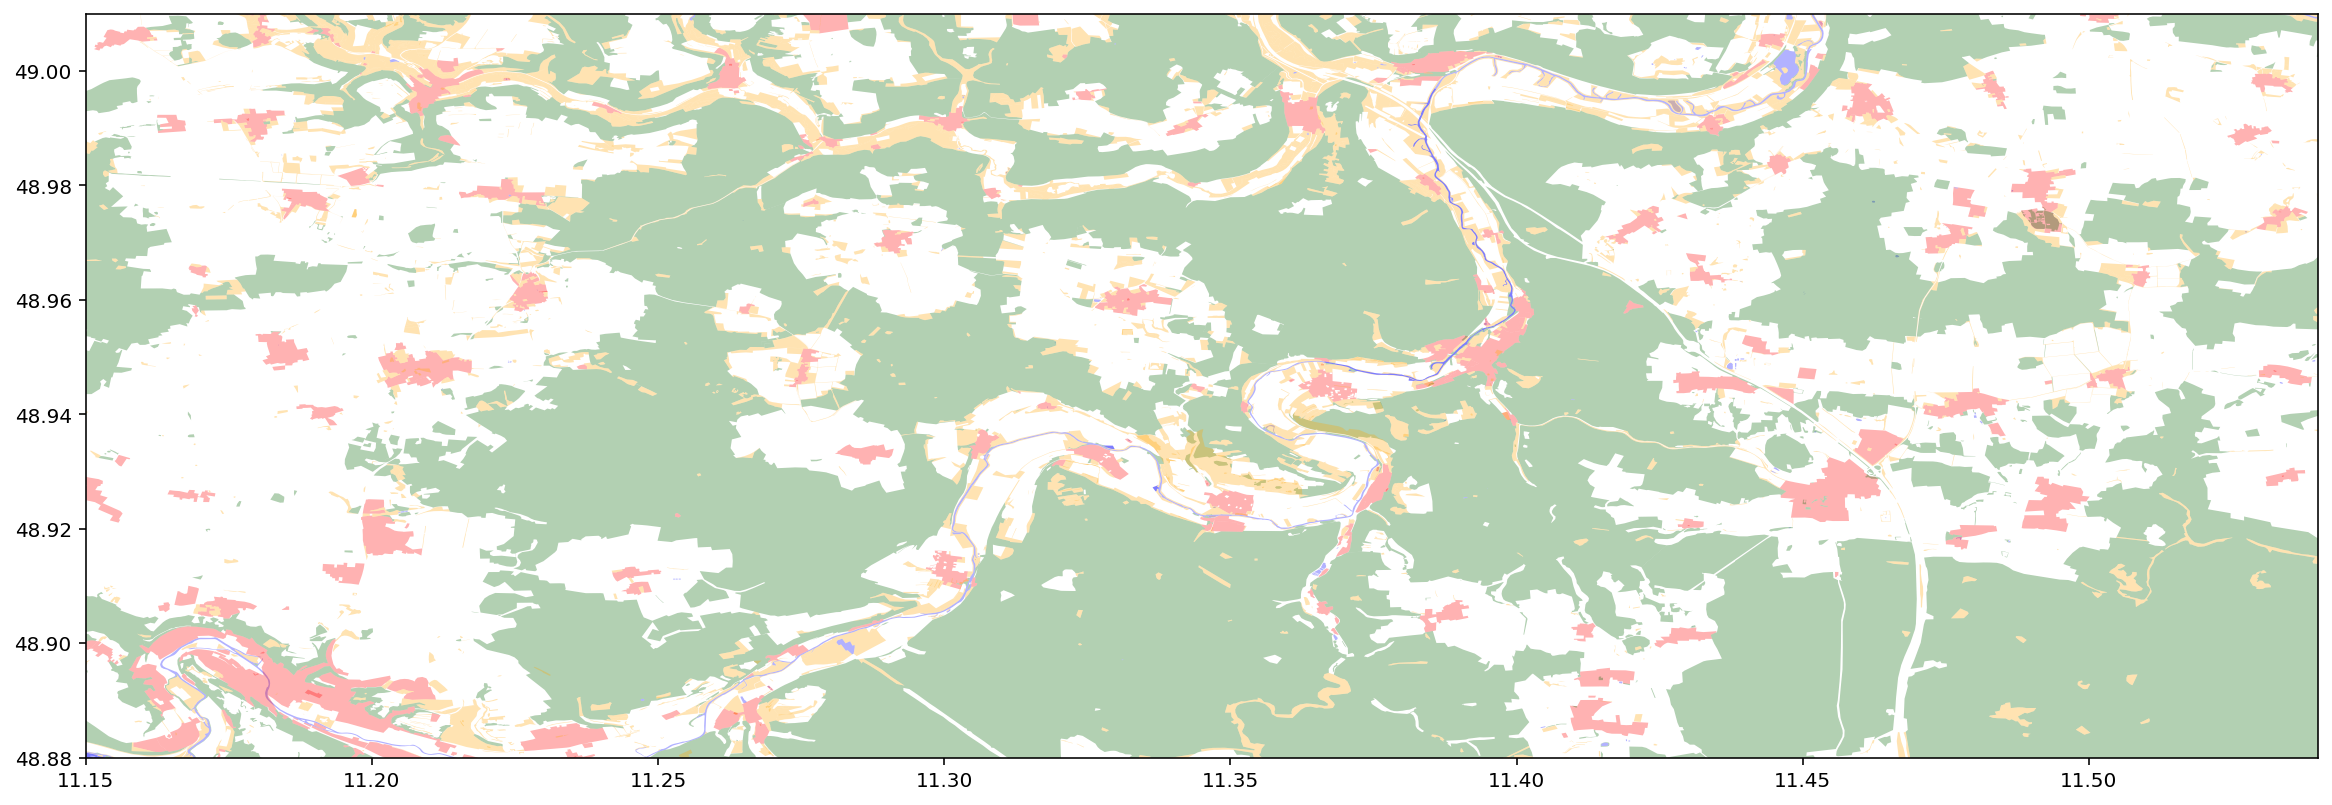

In [10]:
# Load specific libraries
import matplotlib.patheffects as mpe
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.offsetbox import AnchoredText
# set some parameters
outline=mpe.withStroke(linewidth=8, foreground='black')
alpha = .3
source = 'http://download.geofabrik.de/osm-data-in-gis-formats-free.pdf'


#Define fig,ax
fig = plt.figure(figsize=(20,20)) 
ax = plt.axes()

mapxwest = 11.15
mapxeast = 11.54
mapysouth = 48.88
mapynorth = 49.01
plt.xlim(11.15, 11.54)
plt.ylim(48.88, 49.01)

#define layers
map_df_bayern_water.plot(ax=ax, facecolor='blue',alpha=alpha, label='Water')
water_patch = mpatches.Patch(color='blue', alpha=alpha, label='Water')

map_df_bayern_landuse.loc[map_df_bayern_landuse['code'].isin([7203,7204,7206,7207,7209])].plot(
    ax=ax, facecolor='red', alpha=alpha, label='Build-up')
buildup_patch = mpatches.Patch(color='red', alpha=alpha, label='Build Up')

map_df_bayern_landuse.loc[map_df_bayern_landuse['code'] == 7201].plot(
    ax=ax, facecolor='darkgreen', alpha=alpha, label='forest')
forest_patch = mpatches.Patch(color='darkgreen', alpha=alpha, label='Forest')

map_df_bayern_landuse[map_df_bayern_landuse['code'].isin([7210,7211,7219,7217,7208,7218,7202,7210,7207,7215,7213,7216,7228,7229])].plot(ax=ax, facecolor='orange', alpha=alpha, label='Open area')
open_patch = mpatches.Patch(color='orange', alpha=alpha, label='Open Areas')

# map_df_bayern_boundary.loc[map_df_bayern_boundary['KKOD'] <= 4130].plot(ax=ax, edgecolor='black', lw=.5)
# boundary_line = mlines.Line2D([], [],label='Boundary')

map_df_bayern_road.loc[map_df_bayern_road['code'] < 5116].plot(ax=ax,color='red', lw=1)#,path_effects=[outline])
road_line = mlines.Line2D([], [], color='red', label='Major roads')

map_df_bayern_rail.loc[map_df_bayern_rail['code'] == 6101].plot(ax=ax, color='blue', lw=2, label='railroad')
rail_line = mlines.Line2D([], [], color='blue', label='Railroads')  

# #create text labels
# names = map_df_bayern_names[map_df_bayern_names['KKOD'].isin([109, 104])]

# texts = []

# for x, y, label in zip(names.geometry.x, 
#                        names.geometry.y, 
#                        names['TEXT']):
#                          texts.append(plt.text(x, y, label, fontsize = 12, weight='heavy', 
#                                               bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='none')))
#add title     
ax.set_title('bayern Overview', fontdict={'fontsize': '25', 'fontweight' : '3'})

#add annotation
at = AnchoredText(f'Source: {source}',
                  prop=dict(size=10), frameon=True,
                  loc='lower left')
at.patch.set_boxstyle('round,pad=0.,rounding_size=0.2')
ax.add_artist(at)

#plot leggend
# plt.legend(handles=[water_patch, buildup_patch, forest_patch, open_patch, 
#                     road_line, rail_line, boundary_line], bbox_to_anchor=(1.05, 0), 
#            loc='lower left', borderaxespad=0., title='Legend', title_fontsize='12')

ax.grid(True)
# ax.axis('off')

plt.show()

In [14]:
# read and inspect files

file = 'my_riks.shp' 
file_fp = shapedir+file
map_df_sweden = gpd.read_file(file_fp)
print(f'Columns: {map_df_sweden.columns.values.tolist()}\n')

print('KOD \t FREQ \t KATEGORI')
print('--- \t ---- \t --------')
for x,y, z in zip(map_df_sweden['KKOD'].value_counts().index.format(),
                  map_df_sweden['KATEGORI'].value_counts().values.tolist(),
               map_df_sweden['KATEGORI'].value_counts().index.format()):
    print(x,'\t', y,'\t', z)

Columns: ['KKOD', 'KATEGORI', 'NAMN1', 'NAMN2', 'ADAT', 'geometry']

KOD 	 FREQ 	 KATEGORI
--- 	 ---- 	 --------
901 	 40357 	 Vattenyta
611 	 38577 	 Öppen mark
601 	 34208 	 Skogsmark
911 	 22339 	 Sankmark
303 	 2113 	 Tätort
631 	 1372 	 Kalfjäll
302 	 861 	 Annan koncentrerad bebyggelse
641 	 273 	 Glaciär
902 	 139 	 Hav, territorialt vatten
612 	 22 	 Alvarmark


In [15]:
# function to read, inspect data and save as GeoPandas df

def loaddata(infile):
 
    file_fp = shapedir+infile
    outfile = gpd.read_file(file_fp)
    print(f'Columns: {outfile.columns.values.tolist()}\n')

    print('KOD \t FREQ \t KATEGORI')
    print('--- \t ---- \t --------')
    for x,y, z in zip(outfile['KKOD'].value_counts().index[1:].format(),
                      outfile['KATEGORI'].value_counts().values[1:].tolist(),
                   outfile['KATEGORI'].value_counts().index[1:].format()):
        print(x,'\t', y,'\t', z)
        
    return outfile

In [16]:
map_df_sweden_names = loaddata('tx_riks.shp')

Columns: ['TEXT', 'KKOD', 'KATEGORI', 'TJUST', 'TSPARR', 'TRIKT', 'ADAT', 'geometry']

KOD 	 FREQ 	 KATEGORI
--- 	 ---- 	 --------
1   	 10855 	 Enstaka hus eller gård
52  	 10330 	 Naturnamn, små områden
76  	 8881 	 Höjdvärde
82  	 6206 	 Vattenyta, mycket litet område
5   	 1593 	 Tätort, 200-1999 inv
18  	 1574 	 Församlingskyrka
92  	 1463 	 Vattendrag, litet
12  	 1250 	 Tätortsdel, liten
3   	 1181 	 Stor by
98  	 918 	 Sankmark, liten
79  	 848 	 Vägnummer, riks- och länsväg
53  	 470 	 Naturnamn, litet område
61  	 402 	 Upplysningstext, liten
10  	 392 	 Annan konc bebyggelse, liten
83  	 309 	 Vattenyta, litet område
80  	 287 	 Trafikplatsnummer
11  	 239 	 Annan konc bebyggelse, stor
81  	 235 	 Vägnummer, europaväg
27  	 211 	 Offentlig byggnad t.ex. skola, slott m.m.
41  	 194 	 Naturreservat, litet
33  	 181 	 Landskap
7   	 179 	 Tätort, 2000-9999 inv
71  	 150 	 Industri, gruva, fyr, sluss, damm m.m.
107 	 141 	 Tätort, kommuncentrum, 2 000 - 9 999 inv
17  	 110 	 Ann

## Create overview map with custom legend

Turns out Matplotlib does not support legend handles automatically for Polygon geometries in geopandas. 
(https://github.com/geopandas/geopandas/issues/660). Creating a legend artist for every layer is the only workaround.
For lines and point  it does and in that case simply declaring a 'label = 'label'' with a 'plt.legend' would suffice.

This also illustrates the overlapping labels issue

## Zooming in



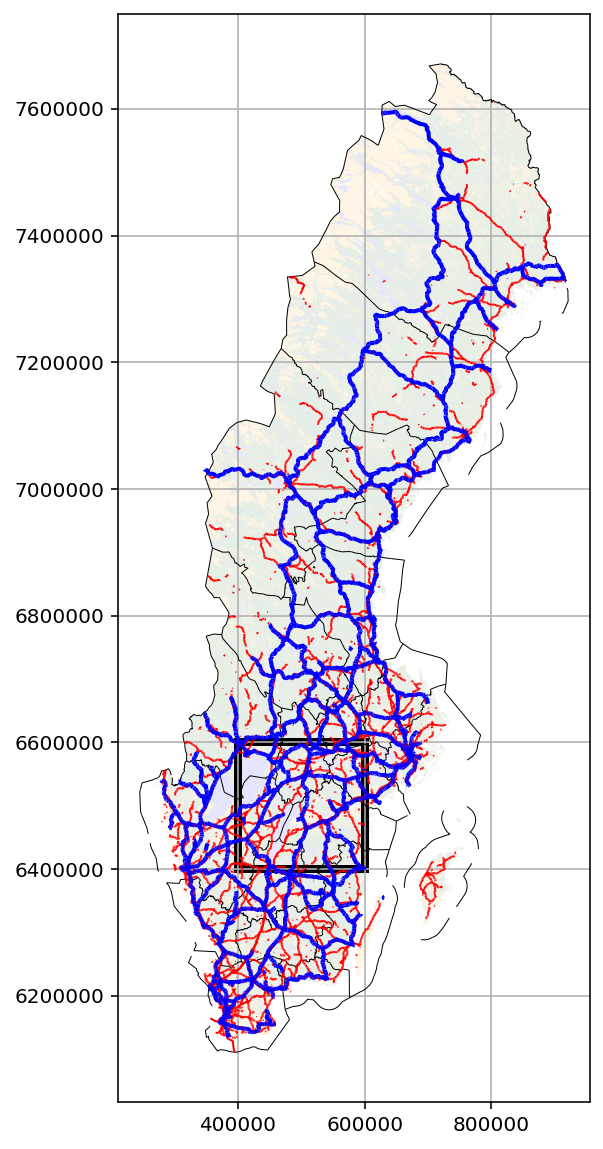

In [100]:
#Load specific libraries
import matplotlib.patheffects as mpe
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.offsetbox import AnchoredText
# set some parameters
outline=mpe.withStroke(linewidth=8, foreground='black')
alpha = .1
source = 'Landmeteriet.se'

#Define fig,ax
fig = plt.figure(figsize=(10,10)) 
ax = plt.axes()

#define layers
map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 901].plot(
    ax=ax, facecolor='blue',alpha=alpha, label='Water')
water_patch = mpatches.Patch(color='blue', alpha=alpha, label='Water')

map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 303].plot(
    ax=ax, facecolor='red', alpha=alpha, label='Build-up')
buildup_patch = mpatches.Patch(color='red', alpha=alpha, label='Build Up')

map_df_sweden_landuse.loc[map_df_sweden_landuse['KKOD'] == 601].plot(
    ax=ax, facecolor='darkgreen', alpha=alpha, label='forest')
forest_patch = mpatches.Patch(color='darkgreen', alpha=alpha, label='Forest')

map_df_sweden_landuse[map_df_sweden_landuse['KKOD'].isin([611,612,911, 631, 302])].plot(
    ax=ax, facecolor='orange', alpha=alpha, label='Open area')
open_patch = mpatches.Patch(color='orange', alpha=alpha, label='Open Areas')

map_df_sweden_boundary.loc[map_df_sweden_boundary['KKOD'] <= 4130].plot(ax=ax, edgecolor='black', lw=.5)
boundary_line = mlines.Line2D([], [],label='Boundary')

map_df_sweden_road.loc[map_df_sweden_road['KKOD'] < 5300].plot(ax=ax,color='red', lw=1)#,path_effects=[outline])
road_line = mlines.Line2D([], [], color='red', label='Major roads')

map_df_sweden_rail.plot(ax=ax, color='blue', lw=2, label='railroad')
rail_line = mlines.Line2D([], [], color='blue', label='Railroads')  

#create text labels
# names = map_df_sweden_names[map_df_sweden_names['KKOD'].isin([109, 104])]

# texts = []

# for x, y, label in zip(names.geometry.x, 
#                        names.geometry.y, 
#                        names['TEXT']):
#                          texts.append(plt.text(x, y, label, fontsize = 12, weight='heavy', 
#                                               bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='none')))
# #add title     
# ax.set_title('Sweden Overview', fontdict={'fontsize': '25', 'fontweight' : '3'})

# #add annotation
# at = AnchoredText(f'Source: {source}',
#                   prop=dict(size=10), frameon=True,
#                   loc='lower left')
# at.patch.set_boxstyle('round,pad=0.,rounding_size=0.2')
# ax.add_artist(at)

# #plot leggend
# plt.legend(handles=[water_patch, buildup_patch, forest_patch, open_patch, 
#                     road_line, rail_line, boundary_line], bbox_to_anchor=(1.05, 0), 
#            loc='lower left', borderaxespad=0., title='Legend', title_fontsize='12')
rect = mpatches.Rectangle((mapxwest,mapysouth), mapxeast-mapxwest,mapynorth-mapysouth, lw=4, edgecolor='black', fc='none')
ax.add_patch(rect)
ax.grid(True)
# ax.axis('off')

plt.show()

In [86]:
mpatches.Rectangle((mapxwest,mapysouth), mapxeast-mapxwest,mapynorth-mapysouth, lw=20, color='black')

In [64]:
# # way to control colors, insert color column
# fig, ax = plt.subplots()
# ax.set_aspect('equal')
# gpd.plotting.plot_polygon_collection(ax, gdf['geometry'], gdf['colors'], plot_values=False)

In [66]:
# plt.figure(figsize=(20,20)) 
# ax=plt.axes()
# plt.xlim(mapxwest,mapxeast)
# plt.ylim(mapysouth, mapynorth)
map_df_sweden_names_.loc[(map_df_sweden_names_['KKOD'].isin([109, 104, 108]))].shape

(23, 8)

TypeError: cannot unpack non-iterable AxesSubplot object

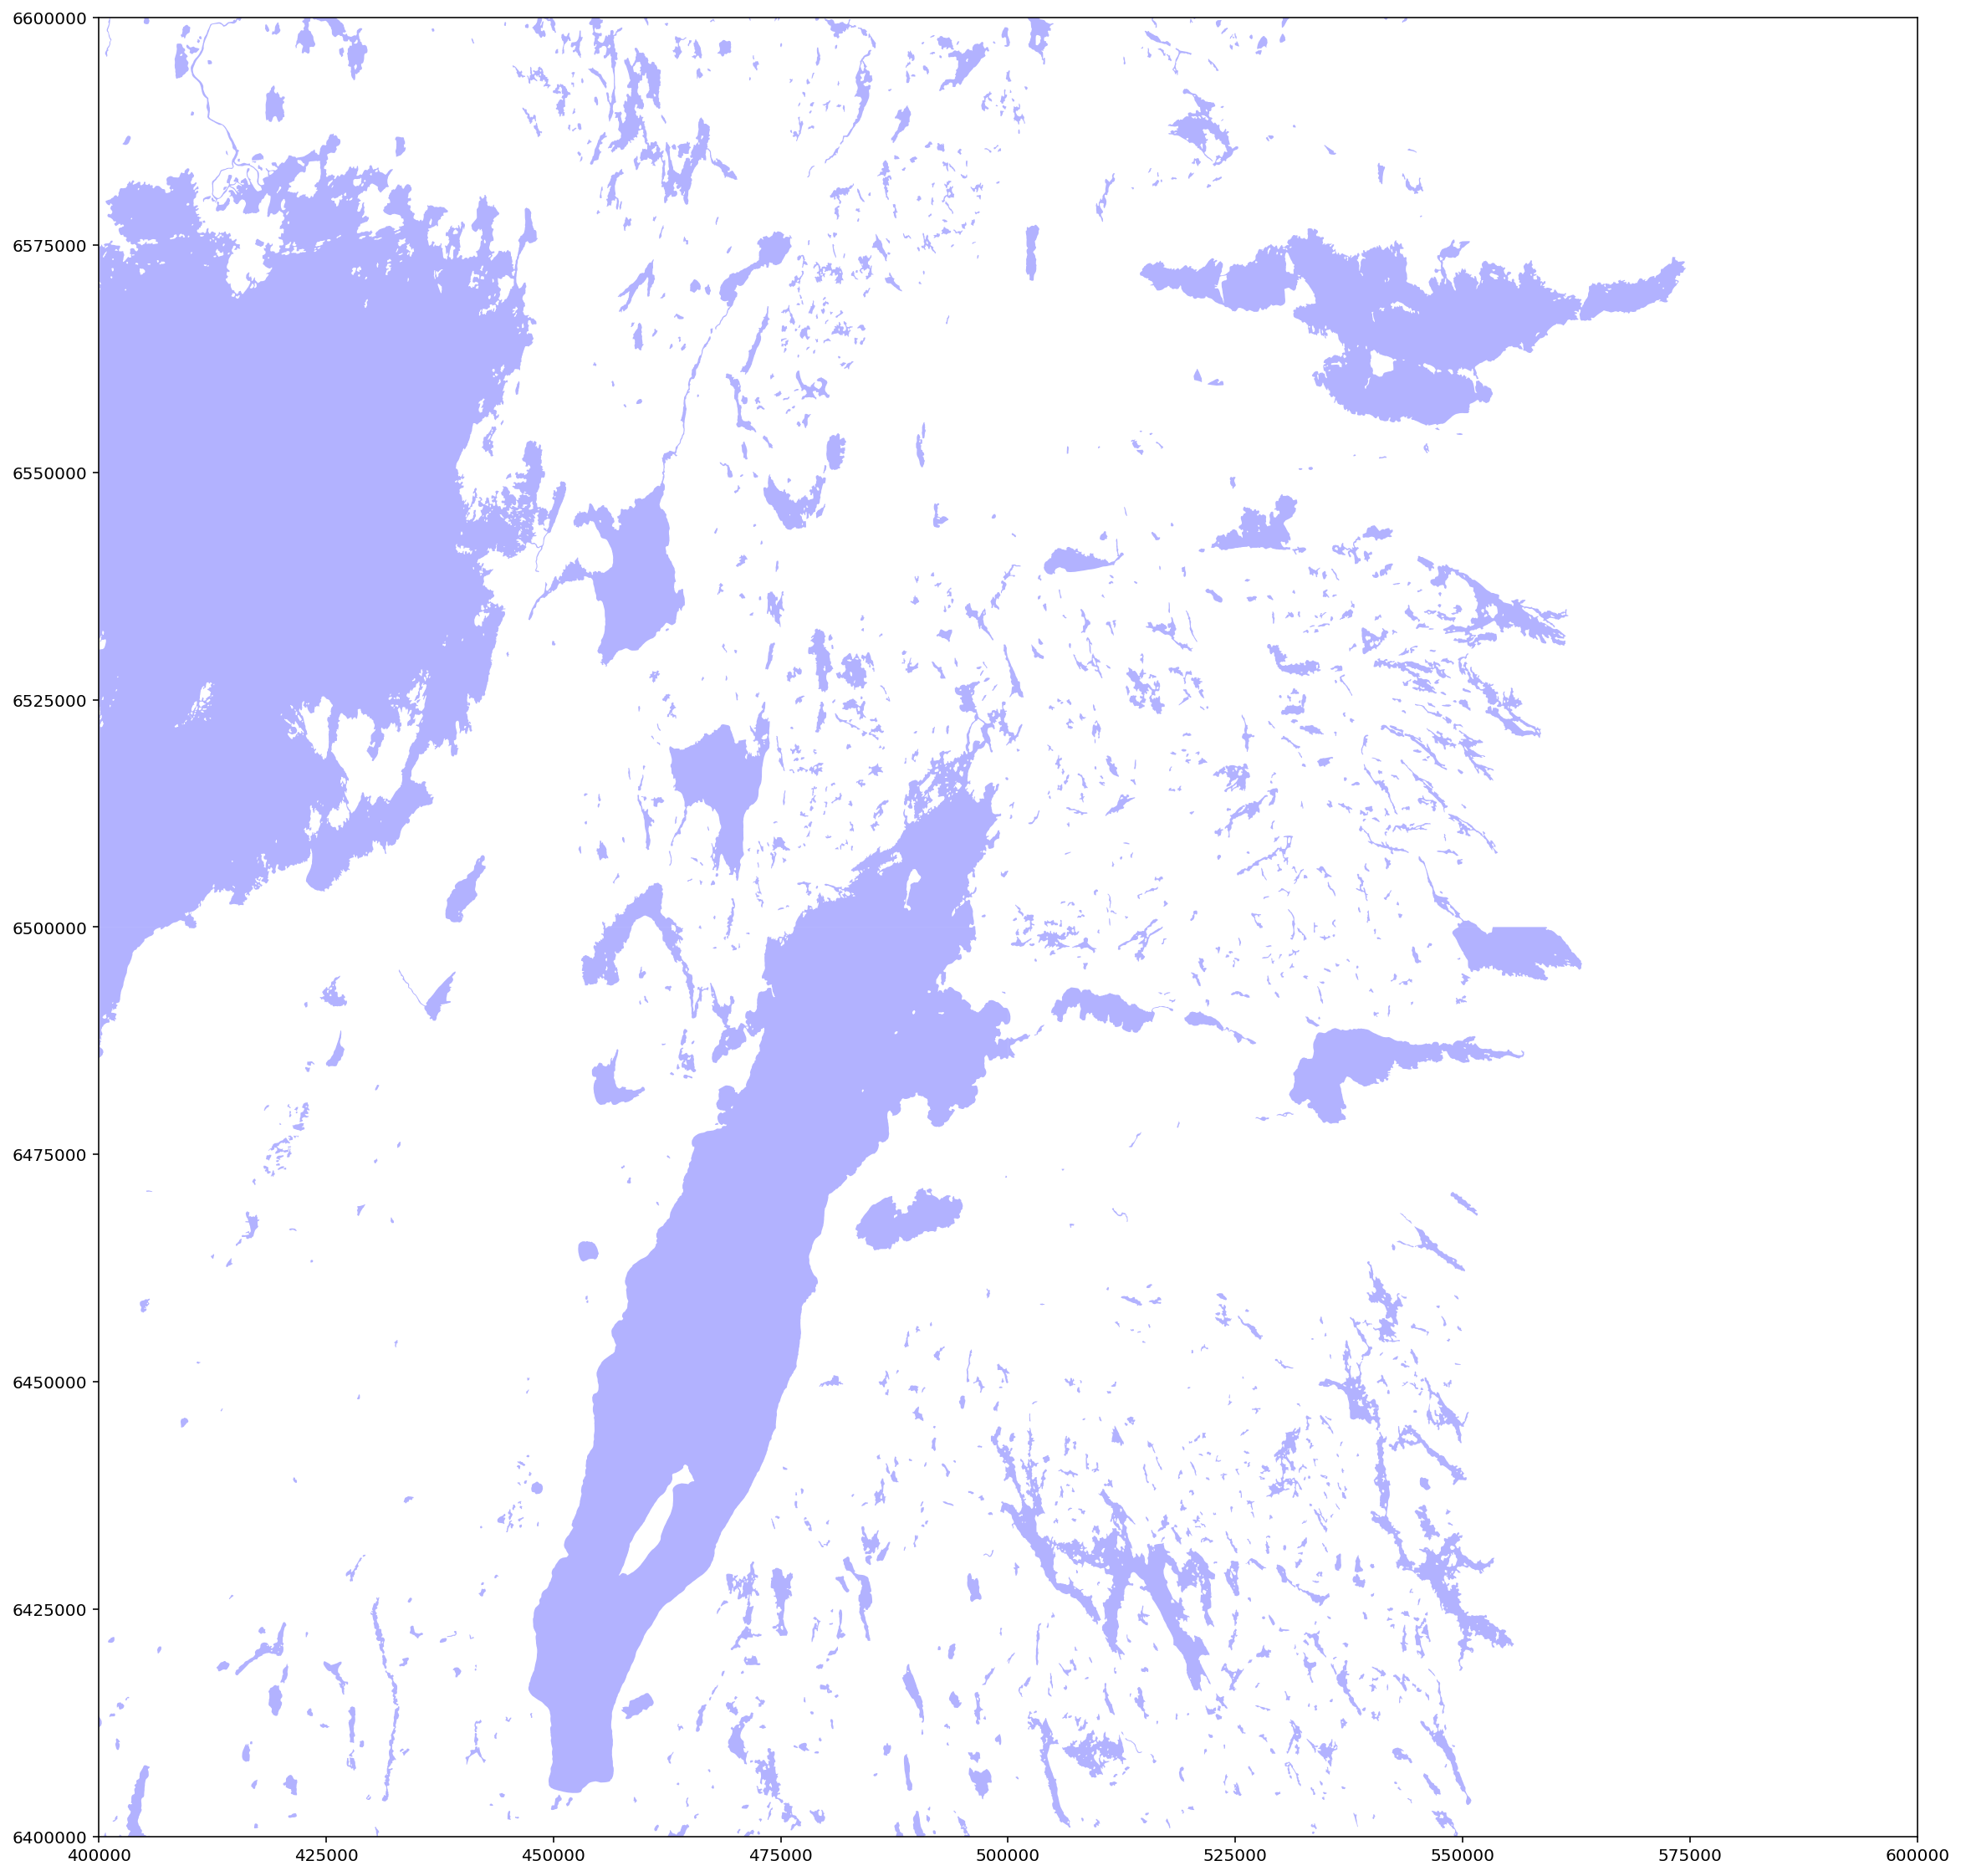

In [105]:
import matplotlib.patheffects as mpe

outline=mpe.withStroke(linewidth=8, foreground='black')





plt.figure(figsize=(20,20)) 
ax=plt.axes()
plt.xlim(mapxwest,mapxeast)
plt.ylim(mapysouth, mapynorth)


# ax.axis('off')
# map_df_sweden.plot(edgecolor='black',facecolor='white',ax=ax)
map_df_sweden_water.loc[map_df_sweden_water['KKOD'] == 901].plot(
    ax=ax, facecolor='blue',alpha=0.3, label='Water')

# map_df_sweden_water.loc[map_df_sweden_water['KKOD'] == 303].plot(
#     ax=ax, facecolor='red', alpha=0.3, label='Build-up')
# map_df_sweden_water.loc[map_df_sweden_water['KKOD'] == 601].plot(
#     ax=ax, facecolor='darkgreen', alpha=.3, label='forest')
# map_df_sweden_water[map_df_sweden_water['KKOD'].isin([611,612,911, 631, 302])].plot(
#     ax=ax, facecolor='orange', alpha=.3, label='Open area')
# map_df_sweden_boundary.loc[map_df_sweden_boundary['KKOD'] <= 4130].plot(ax=ax, edgecolor='black', lw=.5)
# map_df_sweden_road.loc[map_df_sweden_road['KKOD'] < 5300].plot(ax=ax,color='red', lw=1)#,
#                                                                     #   path_effects=[outline])
# map_df_sweden_rail.plot(ax=ax, color='blue', lw=2, label='railroad')

# names = map_df_sweden_names.loc[(map_df_sweden_names['KKOD'].isin([109, 104, 108])) & (map_df_sweden_names[map_df_sweden_names.geometry.within(map_df_sweden_names.geometry.cx[shapexwest:shapexeast,shapeysouth:shapeynorth])])]
                            
# texts = []

# for x, y, label in zip(names.geometry.x, 
#                        names.geometry.y, 
#                        names['TEXT']):
#                         texts.append(plt.text(x, y, label, fontsize = 12, weight='heavy'))
names = map_df_sweden_names_.loc[(map_df_sweden_names_['KKOD'].isin([109, 104, 108]))]
                            
texts = []

for x, y, label in zip(names.geometry.x, 
                       names.geometry.y, 
                       names['TEXT']):
                        texts.append(plt.text(x, y, label, fontsize = 12, weight='heavy'))
ax.grid(True)

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

water = mpatches.Patch(color='blue', label='Water')
plt.legend(handles=[water], bbox_to_anchor=(1.05, 0), loc=2, borderaxespad=0.5, fontsize='30')

plt.show()

In [88]:
import matplotlib.patheffects as mpe

outline=mpe.withStroke(linewidth=8, foreground='black')





plt.figure(figsize=(20,20)) 
ax=plt.axes()
# plt.xlim(mapxwest,mapxeast)
# plt.ylim(mapysouth, mapynorth)
plt.xlim(400000,425000)
plt.ylim(6565000,6590000)

bounds=map_df_sweden_names['geometry'].cx[400000:425000,6565000:6590000]
map_df_sweden_names__ = map_df_sweden_names[map_df_sweden_names.geometry.within(bounds)]
names=map_df_sweden_names__.loc[(map_df_sweden_names__['KKOD'].isin([109, 104, 108, 107, 5, 105, 7, 1]))]


ax.axis('off')
map_df_sweden.plot(edgecolor='black',facecolor='white',ax=ax)
x = map_df_sweden_water.loc[map_df_sweden_water['KKOD'] == 901].plot(
    ax=ax, facecolor='blue',alpha=0.5, label='Water')

map_df_sweden_water.loc[map_df_sweden_water['KKOD'] == 303].plot(
    ax=ax, facecolor='red', alpha=0.3, label='Build-up')
map_df_sweden_water.loc[map_df_sweden_water['KKOD'] == 601].plot(
    ax=ax, facecolor='darkgreen', alpha=.3, label='forest')
map_df_sweden_water[map_df_sweden_water['KKOD'].isin([611,612,911, 631, 302])].plot(
    ax=ax, facecolor='orange', alpha=.3, label='Open area')
map_df_sweden_boundary.loc[map_df_sweden_boundary['KKOD'] <= 4130].plot(ax=ax, edgecolor='black', lw=.5)
# map_df_sweden_road.loc[map_df_sweden_road['KKOD'] < 5600].plot(ax=ax,color='red', lw=1)#,
#                                                                     #   path_effects=[outline])
map_df_sweden_road.plot(ax=ax,color='red', lw=1)#,
                                                                    #   path_effects=[outline])
map_df_sweden_rail.plot(ax=ax, color='blue', lw=2, label='railroad')


texts = []

for x, y, label in zip(names.geometry.x, 
                       names.geometry.y, 
                       names['TEXT']):
                        texts.append(plt.text(x, y, label, fontsize = 12, weight='heavy', 
                                              bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='none')))
      

ax.grid(True)
plt.legend(bbox_to_anchor=(1.05, 0), loc=2, borderaxespad=0.5);



# # remove the axis
# ax.axis(‘off’)
# # add a title
# ax.set_title(‘Population of Rajasthan’, fontdict={‘fontsize’: ‘25’, ‘fontweight’ : ‘3’})
# # create an annotation for the data source
# ax.annotate(‘Source: Rajasthan Datastore, 2019’,xy=(0.1, .08), xycoords=’figure fraction’, horizontalalignment=’left’, verticalalignment=’top’, fontsize=12, color=’#555555')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x116917290> (for post_execute):


TypeError: float() argument must be a string or a number, not 'list'

TypeError: float() argument must be a string or a number, not 'list'

<Figure size 1440x1440 with 1 Axes>

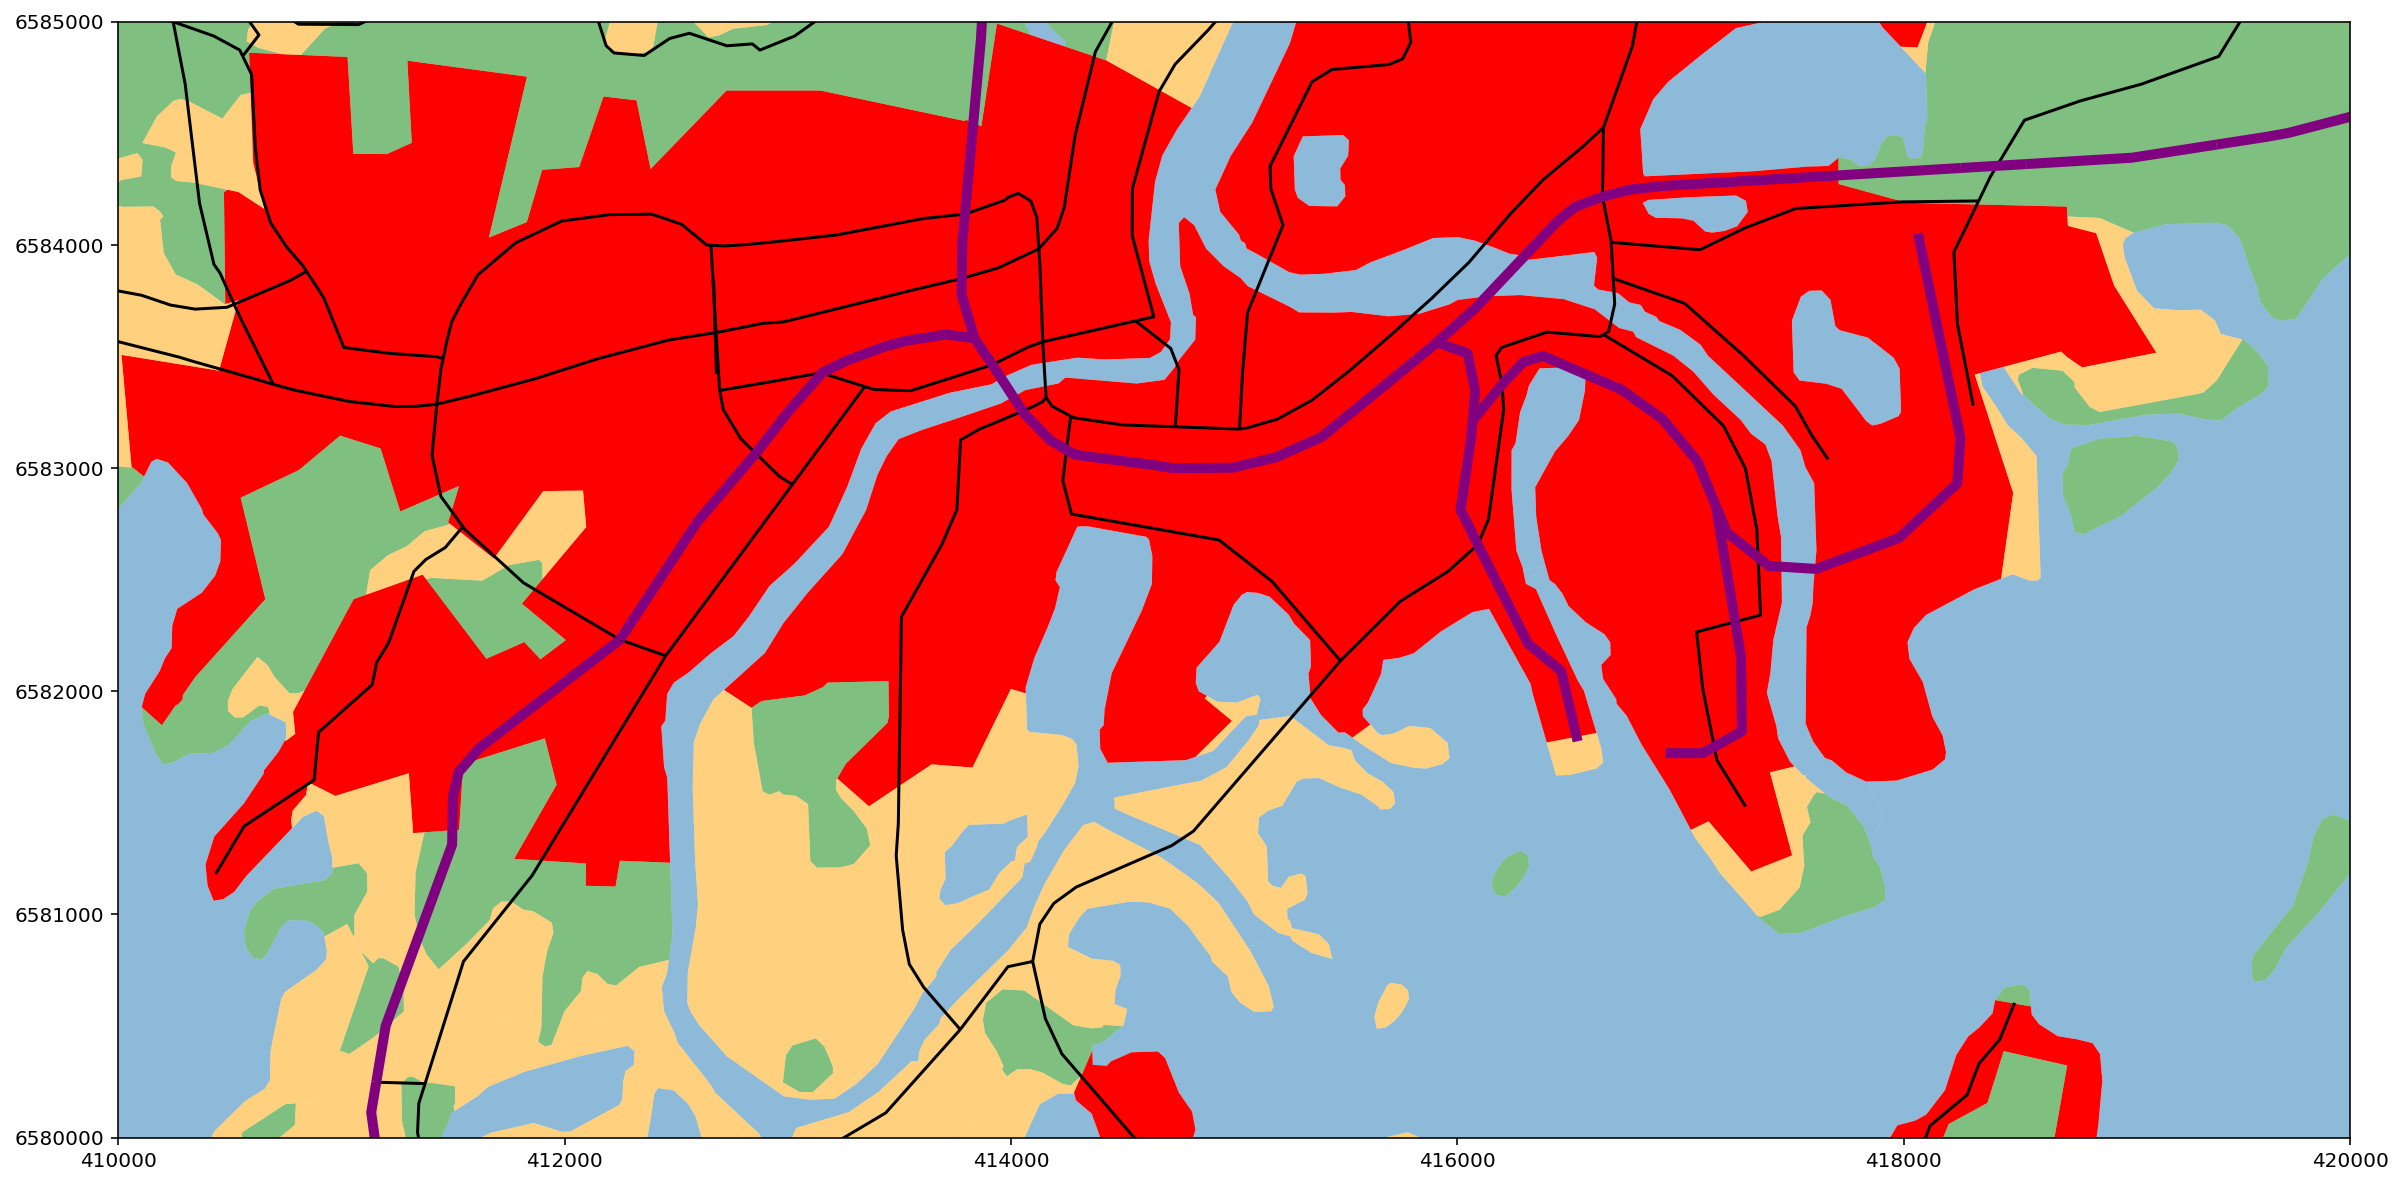

In [106]:
plt.figure(figsize=(20,20)) 
ax=plt.axes()
plt.xlim(410000,420000)
plt.ylim(6580000,6585000)

# ax.axis('off')
# map_df_sweden.plot(edgecolor='black',facecolor='white',ax=ax)
map_df_sweden_water.loc[map_df_sweden_water['KKOD'] == 901].plot(ax=ax, alpha=0.5)
map_df_sweden_water.loc[map_df_sweden_water['KKOD'] == 303].plot(ax=ax, facecolor='red')

map_df_sweden_water.loc[map_df_sweden_water['KKOD'] == 601].plot(ax=ax, facecolor='green', alpha=.5)
map_df_sweden_water[map_df_sweden_water['KKOD'].isin([611,612,911, 902, 631, 302])].plot(ax=ax, facecolor='orange',
                                                                                                           alpha=.5)


map_df_sweden_boundary.loc[map_df_sweden_boundary['KKOD'] <= 4130].plot(ax=ax)
map_df_sweden_road.loc[map_df_sweden_road['KKOD'] < 5700].plot(ax=ax, color='black')
map_df_sweden_rail.plot(ax=ax, color='purple', lw=5)#overlay water in white
# map_df_kustlijn.plot(edgecolor='white', facecolor='blue',ax=ax);


No handles with labels found to put in legend.


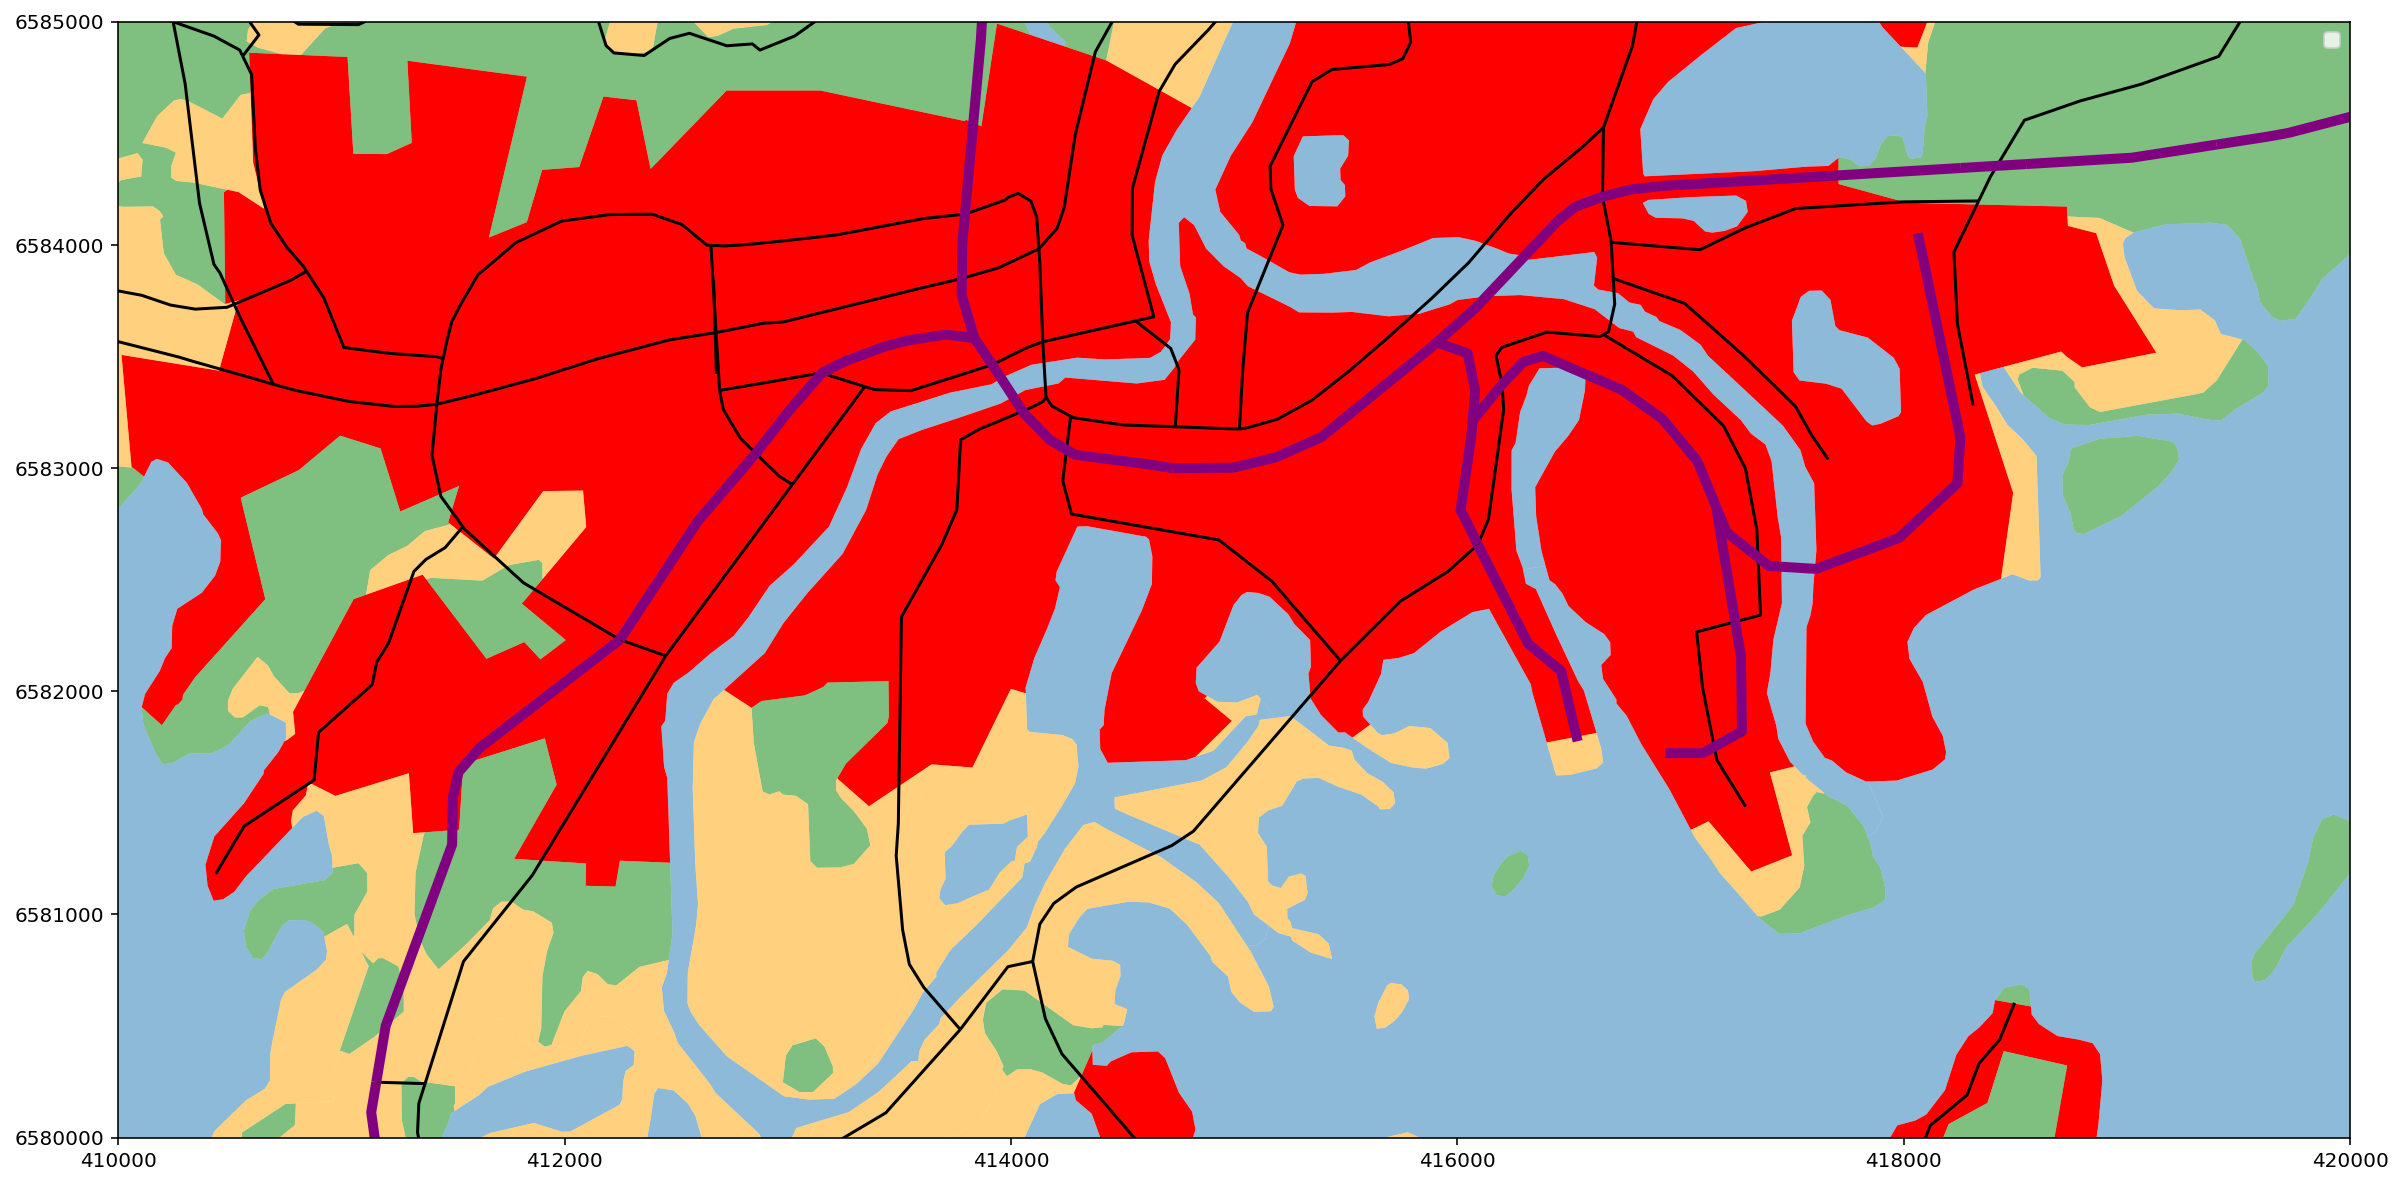

In [107]:
plt.figure(figsize=(20,20)) 
ax=plt.axes()
plt.xlim(410000,420000)
plt.ylim(6580000,6585000)

# ax.axis('off')
# map_df_sweden.plot(edgecolor='black',facecolor='white',ax=ax)
map_df_sweden_water.loc[map_df_sweden_water['KKOD'] == 901].plot(ax=ax, alpha=0.5)
map_df_sweden_water.loc[map_df_sweden_water['KKOD'] == 303].plot(ax=ax, facecolor='red')

map_df_sweden_water.loc[map_df_sweden_water['KKOD'] == 601].plot(ax=ax, facecolor='green', alpha=.5)
map_df_sweden_water[map_df_sweden_water['KKOD'].isin([611,612,911, 902, 631, 302])].plot(ax=ax, facecolor='orange',
                                                                                                           alpha=.5)


map_df_sweden_boundary.loc[map_df_sweden_boundary['KKOD'] <= 4130].plot(ax=ax)
map_df_sweden_road.loc[map_df_sweden_road['KKOD'] < 5700].plot(ax=ax, color='black')
map_df_sweden_rail.plot(ax=ax, color='purple', lw=5)#overlay water in white
# map_df_kustlijn.plot(edgecolor='white', facecolor='blue',ax=ax);
plt.legend()

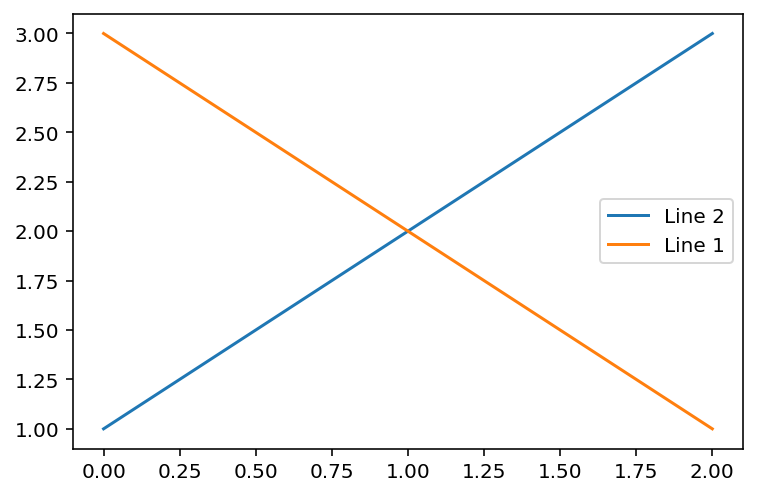

In [92]:
line_up, = plt.plot([1,2,3], label='Line 2')
line_down, = plt.plot([3,2,1], label='Line 1')
plt.legend()#handles=[line_up, line_down])

In [116]:
map_df_sweden['KATEGORI'].value_counts()

Vattenyta                        40357
Öppen mark                       38577
Skogsmark                        34208
Sankmark                         22339
Tätort                            2113
Kalfjäll                          1372
Annan koncentrerad bebyggelse      861
Glaciär                            273
Hav, territorialt vatten           139
Alvarmark                           22
Name: KATEGORI, dtype: int64

In [172]:
# temp=map_df_sweden.loc[map_df_sweden['KATEGORI']=='Öppen mark']
bounds=map_df_sweden['geometry'].cx[450000:550000,6700000:6800000]

In [173]:
sw_sub = map_df_sweden[map_df_sweden.geometry.within(bounds)]
